In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"anggaranag","key":"ef9a6b2e3d17c5f0443aa6ef9af3e012"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
!kaggle datasets download -d shruthiiiee/orange-quality

Dataset URL: https://www.kaggle.com/datasets/shruthiiiee/orange-quality
License(s): apache-2.0
  0% 0.00/3.73k [00:00<?, ?B/s]
100% 3.73k/3.73k [00:00<00:00, 18.2MB/s]


In [4]:
!mkdir -p orange-quality
!unzip -o orange-quality.zip -d orange-quality
!ls orange-quality

Archive:  orange-quality.zip
  inflating: orange-quality/Orange Quality Data.csv  
'Orange Quality Data.csv'


In [5]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('orange-quality/Orange Quality Data.csv')

# Rename the last column to 'Target'
df.columns = list(df.columns[:-1]) + ['Target']

# Define the threshold for binary classification (e.g., >= 4.0 is 'good')
threshold = 4.0
df['Target_Binary'] = (df['Target'] >= threshold).astype(int)

print("Data loaded and prepared:")
print("DataFrame head:")
display(df.head()) # Display head to confirm df state

Data loaded and prepared:
DataFrame head:


,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Target,Target_Binary
0,7.5,180,12.0,3.2,2.0,10,4.0,Orange,Valencia,N,4.0,1
1,8.2,220,10.5,3.4,3.0,14,4.5,Deep Orange,Navel,N,4.5,1
2,6.8,150,14.0,3.0,1.0,7,5.0,Light Orange,Cara Cara,N,5.0,1
3,9.0,250,8.5,3.8,4.0,21,3.5,Orange-Red,Blood Orange,N,3.5,0
4,8.5,210,11.5,3.3,2.5,12,5.0,Orange,Hamlin,Y (Minor),4.5,1


In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# 1. Pisahkan fitur dan target
X = df.drop(columns=['Target', 'Target_Binary']) # Use the dataframe with Target_Binary
y = df['Target_Binary'] # Use the binary target

# 2. Pisahkan fitur numerik dan kategorikal
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'bool', 'category']).columns.tolist()

# 3. Buat preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# 4. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # stratify by the binary target

# 5. Terapkan preprocessing
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print("Preprocessing complete. X_train_processed and X_test_processed are created.")
print("X_train_processed shape:", X_train_processed.shape)
print("X_test_processed shape:", X_test_processed.shape)

Preprocessing complete. X_train_processed and X_test_processed are created.
X_train_processed shape: (192, 47)
X_test_processed shape: (49, 47)


In [7]:
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix, classification_report # Added imports

# 7. Bangun model
model = keras.Sequential([
    keras.Input(shape=(X_train_processed.shape[1],)),
    layers.Dense(128, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

# 8. Kompilasi model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 9. Latih model
history = model.fit(
    X_train_processed, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test_processed, y_test)
)

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - accuracy: 0.6303 - loss: 0.6629 - val_accuracy: 0.7347 - val_loss: 0.6162
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7692 - loss: 0.5801 - val_accuracy: 0.7347 - val_loss: 0.5570
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8342 - loss: 0.5057 - val_accuracy: 0.7551 - val_loss: 0.5018
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8407 - loss: 0.4420 - val_accuracy: 0.8163 - val_loss: 0.4574
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8282 - loss: 0.3810 - val_accuracy: 0.7959 - val_loss: 0.4285
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8460 - loss: 0.3555 - val_accuracy: 0.8367 - val_loss: 0.4010
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.8736 - loss: 0.2968 - val_accuracy: 0.8571 - val_loss: 0.3816
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8829 - loss: 0.2751 - val_accuracy: 0.8571 - val_loss: 0.3660


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


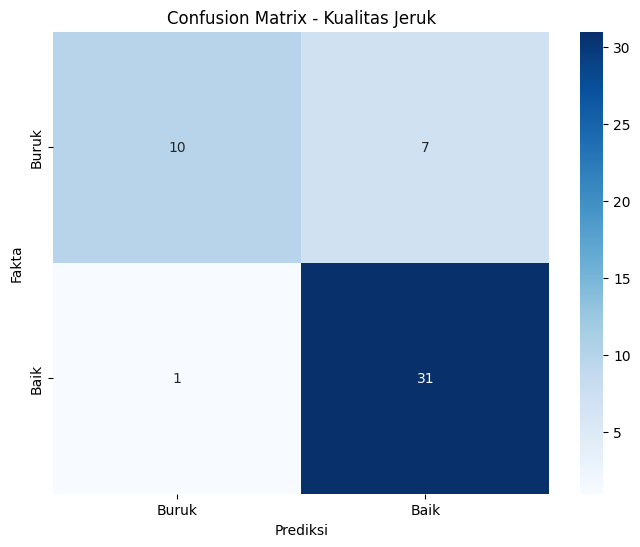

Classification Report:
              precision    recall  f1-score   support

       Buruk       0.91      0.59      0.71        17
        Baik       0.82      0.97      0.89        32

    accuracy                           0.84        49
   macro avg       0.86      0.78      0.80        49
weighted avg       0.85      0.84      0.83        49



In [8]:
from sklearn.metrics import confusion_matrix, classification_report # Added imports
import matplotlib.pyplot as plt
import seaborn as sns


# Hasil prediksi model
y_pred_classes = (model.predict(X_test_processed) > 0.5).astype("int").flatten()

# Confusion Matrix (dengan label encoded)
cm = confusion_matrix(y_test, y_pred_classes) # Use y_test directly since it's already encoded

# Label string dari hasil encoding
# Assuming label_encoder is defined from the previous preprocessing step
class_names = ["Buruk", "Baik"] # Define class names based on binary target 0 and 1

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names) # Use class_names for labels
plt.xlabel('Prediksi')
plt.ylabel('Fakta')
plt.title('Confusion Matrix - Kualitas Jeruk')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_classes, target_names=class_names)) # Use class_names for target_names

## Feature selection

### Subtask:
Menentukan 7 fitur terbaik dari dataset asli yang akan digunakan sebagai input model. Ini bisa dilakukan berdasarkan analisis korelasi, pentingnya fitur dari model sebelumnya (jika memungkinkan), atau pengetahuan domain.


In [9]:
# 1. Calculate the absolute correlation matrix for the numerical features
numerical_df = df.select_dtypes(include=np.number)
correlation_matrix = numerical_df.corr().abs()

# Identify numerical features with high correlation to 'Target_Binary'
# We will look at the correlation with the *binary* target created previously
correlation_with_target_binary = correlation_matrix['Target_Binary'].sort_values(ascending=False)

print("Absolute correlation with Target_Binary (Numerical Features):")
print(correlation_with_target_binary)

# 2. Identify the numerical features with the highest absolute correlation to the 'Target_Binary' column.
# 3. Consider including categorical features that might be relevant based on domain knowledge or initial data exploration.
# 4. Select the top 7 features, prioritizing those with high correlation to the target and potentially including relevant categorical features.
# Based on the correlation and domain knowledge (e.g., Color, Variety, Blemishes are likely important),
# select the top numerical features and some relevant categorical features.

# Let's pick the top numerical features and some categorical ones
# Top numerical features by correlation: Ripeness (1-5), Brix (Sweetness), Softness (1-5), Size (cm), pH (Acidity), Weight (g), HarvestTime (days)
# Relevant categorical features: Color, Variety, Blemishes (Y/N)

# Let's aim for a mix, prioritizing the highest correlated numerical and including key categorical.
# Top 4 numerical: Ripeness (1-5), Brix (Sweetness), Softness (1-5), Size (cm)
# Top 3 categorical (all of them): Color, Variety, Blemishes (Y/N)

selected_features = [
    'Ripeness (1-5)',
    'Brix (Sweetness)',
    'Softness (1-5)',
    'Size (cm)',
    'Color',
    'Variety',
    'Blemishes (Y/N)'
]

print("\nSelected 7 features:")
print(selected_features)

# 5. Create a list named selected_features containing the names of the 7 chosen features.
# This was done in the previous step.

Absolute correlation with Target_Binary (Numerical Features):
Target_Binary         1.000000
Target                0.818600
Brix (Sweetness)      0.632727
HarvestTime (days)    0.370537
Softness (1-5)        0.335558
Weight (g)            0.248544
pH (Acidity)          0.246279
Ripeness (1-5)        0.227089
Size (cm)             0.218034
Name: Target_Binary, dtype: float64

Selected 7 features:
['Ripeness (1-5)', 'Brix (Sweetness)', 'Softness (1-5)', 'Size (cm)', 'Color', 'Variety', 'Blemishes (Y/N)']


## Update preprocessing

### Subtask:
Menyesuaikan langkah preprocessing (`ColumnTransformer`) agar hanya memproses 7 fitur yang dipilih.


In [10]:
# Define the lists for numerical and categorical features based on the selected features
selected_numerical_features = [feature for feature in selected_features if feature in X.select_dtypes(include=np.number).columns]
selected_categorical_features = [feature for feature in selected_features if feature in X.select_dtypes(include=['object', 'bool', 'category']).columns]

# Create a ColumnTransformer instance named preprocessor, specifying the appropriate transformers
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), selected_numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), selected_categorical_features)
])

# Apply the preprocessor to the training data (X_train)
X_train_processed_reduced = preprocessor.fit_transform(X_train[selected_features])

# Apply the fitted preprocessor to the test data (X_test)
X_test_processed_reduced = preprocessor.transform(X_test[selected_features])

# Print the shapes to confirm the reduced number of features
print("Shape of X_train_processed_reduced:", X_train_processed_reduced.shape)
print("Shape of X_test_processed_reduced:", X_test_processed_reduced.shape)

Shape of X_train_processed_reduced: (192, 44)
Shape of X_test_processed_reduced: (49, 44)


In [11]:
from tensorflow import keras
from tensorflow.keras import layers

# 1. Define a new Keras Sequential model.
# 2. Create the first layer using `keras.Input` and set the `shape` parameter to match the number of features in the processed training data.
# 3. Add the subsequent `Dense` layers with appropriate activation functions as used in the previous model.
# The previous model used 128, 64, 32 Dense layers with 'relu' and a final Dense layer with 'sigmoid'.
model_reduced = keras.Sequential([
    keras.Input(shape=(X_train_processed_reduced.shape[1],)),
    layers.Dense(128, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid") # Output layer for binary classification
])

# 4. Compile the new model using the same optimizer and loss function as before.
model_reduced.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 5. Train the newly defined model using the reduced feature sets.
# 6. Include `validation_data` as `(X_test_processed_reduced, y_test)` during training.
# 7. Store the training history in a variable.
history_reduced = model_reduced.fit(
    X_train_processed_reduced, y_train,
    epochs=50, # Using 50 epochs as in the previous attempt
    batch_size=32, # Using batch size 32 as in the previous attempt
    validation_data=(X_test_processed_reduced, y_test)
)

print("\nModel training with reduced features complete.")

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 127ms/step - accuracy: 0.6610 - loss: 0.6281 - val_accuracy: 0.6939 - val_loss: 0.5761
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.6775 - loss: 0.5613 - val_accuracy: 0.7755 - val_loss: 0.5111
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7173 - loss: 0.5084 - val_accuracy: 0.8367 - val_loss: 0.4541
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7978 - loss: 0.4290 - val_accuracy: 0.8367 - val_loss: 0.4050
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8767 - loss: 0.3651 - val_accuracy: 0.8571 - val_loss: 0.3680
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8600 - loss: 0.3545 - val_accuracy: 0.8980 - val_loss: 0.3470
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8640 - loss: 0.3189 - val_accuracy: 0.8980 - val_loss: 0.3306
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8605 - loss: 0.3134 - val_accuracy: 0.8980 - val_loss: 0.3292

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.8903 - loss: 0.5409
Model Loss (Binary Crossentropy) with reduced features: 0.5254
Model Accuracy with reduced features: 0.8980
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step

Confusion Matrix:


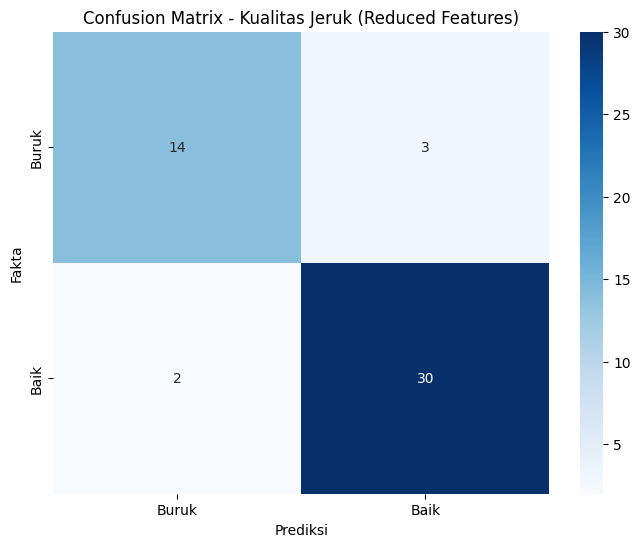


Classification Report:
              precision    recall  f1-score   support

       Buruk       0.88      0.82      0.85        17
        Baik       0.91      0.94      0.92        32

    accuracy                           0.90        49
   macro avg       0.89      0.88      0.89        49
weighted avg       0.90      0.90      0.90        49



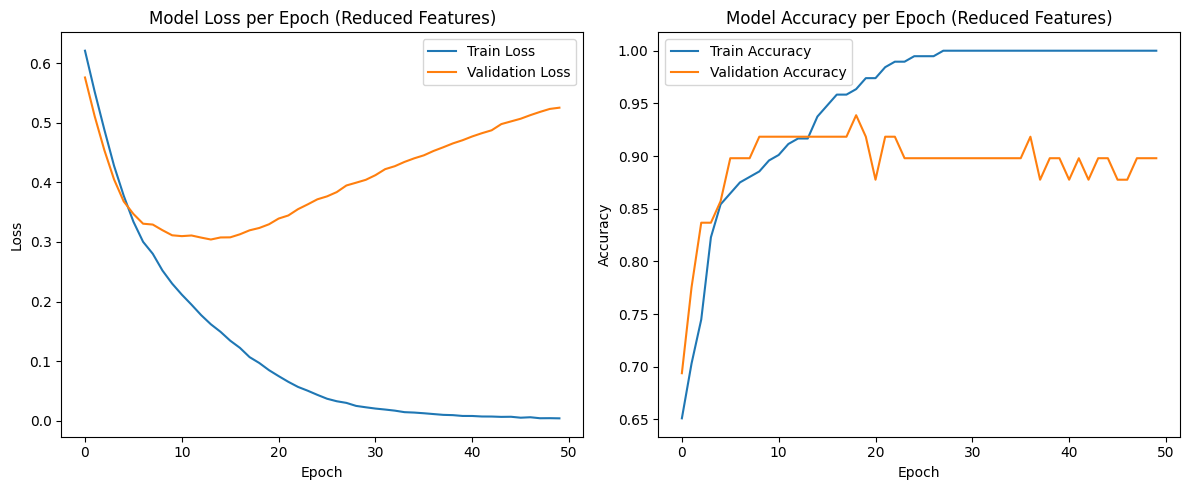

In [12]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Evaluate the model_reduced using the X_test_processed_reduced and y_test data.
loss_reduced, accuracy_reduced = model_reduced.evaluate(X_test_processed_reduced, y_test)

# 2. Print the loss and accuracy obtained from the model evaluation.
print(f"Model Loss (Binary Crossentropy) with reduced features: {loss_reduced:.4f}")
print(f"Model Accuracy with reduced features: {accuracy_reduced:.4f}")

# 3. Generate predictions for the test set X_test_processed_reduced using the model_reduced.
y_pred_probabilities_reduced = model_reduced.predict(X_test_processed_reduced)

# 4. Convert the predicted probabilities to binary class labels (0 or 1) using a threshold of 0.5.
y_pred_classes_reduced = (y_pred_probabilities_reduced > 0.5).astype("int").flatten()

# 5. Generate a confusion matrix using the true labels (y_test) and the predicted binary labels.
cm_reduced = confusion_matrix(y_test, y_pred_classes_reduced)

# 6. Print a classification report using the true labels and predicted binary labels, including precision, recall, and f1-score, using the class names ["Buruk", "Baik"].
class_names = ["Buruk", "Baik"] # Define class names based on binary target 0 and 1

print("\nConfusion Matrix:")
plt.figure(figsize=(8, 6))
sns.heatmap(cm_reduced, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Prediksi')
plt.ylabel('Fakta')
plt.title('Confusion Matrix - Kualitas Jeruk (Reduced Features)')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes_reduced, target_names=class_names))

# 7. Plot the training and validation loss from the history_reduced object to visualize the model's training progress.
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_reduced.history['loss'], label='Train Loss')
plt.plot(history_reduced.history['val_loss'], label='Validation Loss')
plt.title('Model Loss per Epoch (Reduced Features)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history_reduced.history['accuracy'], label='Train Accuracy')
plt.plot(history_reduced.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy per Epoch (Reduced Features)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [13]:
# 1. Calculate the absolute correlation matrix for the numerical features
numerical_df = df.select_dtypes(include=np.number)
correlation_matrix = numerical_df.corr().abs()

# Identify numerical features with high correlation to 'Target_Binary'
# We will look at the correlation with the *binary* target created previously
correlation_with_target_binary = correlation_matrix['Target_Binary'].sort_values(ascending=False)

print("Absolute correlation with Target_Binary (Numerical Features):")
print(correlation_with_target_binary)

# 2. Identify the top 7 numerical features with the highest absolute correlation to the 'Target_Binary' column.
# Since the user wants exactly 7 input features *after* preprocessing, we must select only numerical features.
# The top numerical features by correlation are:
# Target_Binary, Target (exclude as it's the target), Brix (Sweetness), HarvestTime (days), Softness (1-5), Weight (g), pH (Acidity), Ripeness (1-5), Size (cm)
# We need 7 features *other* than the target.
# Let's select the top 7 numerical features by correlation with Target_Binary (excluding Target and Target_Binary themselves).
# Based on the output: Brix, HarvestTime, Softness, Weight, pH, Ripeness, Size

selected_features = [
    'Brix (Sweetness)',
    'HarvestTime (days)',
    'Softness (1-5)',
    'Weight (g)',
    'pH (Acidity)',
    'Ripeness (1-5)',
    'Size (cm)'
]

print("\nSelected 7 numerical features:")
print(selected_features)

# 3. Create a list named selected_features containing the names of the 7 chosen numerical features.
# This was done in the previous step.

Absolute correlation with Target_Binary (Numerical Features):
Target_Binary         1.000000
Target                0.818600
Brix (Sweetness)      0.632727
HarvestTime (days)    0.370537
Softness (1-5)        0.335558
Weight (g)            0.248544
pH (Acidity)          0.246279
Ripeness (1-5)        0.227089
Size (cm)             0.218034
Name: Target_Binary, dtype: float64

Selected 7 numerical features:
['Brix (Sweetness)', 'HarvestTime (days)', 'Softness (1-5)', 'Weight (g)', 'pH (Acidity)', 'Ripeness (1-5)', 'Size (cm)']


In [14]:
# Define the lists for numerical and categorical features based on the selected features
# Since we are selecting only 7 numerical features for the final model input,
# selected_numerical_features will be the selected_features list, and
# selected_categorical_features will be empty.
selected_numerical_features = selected_features
selected_categorical_features = []

# Create a ColumnTransformer instance named preprocessor, specifying the appropriate transformers
# Only include the numerical transformer since we are only using numerical features
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), selected_numerical_features)
], remainder='passthrough') # Keep other columns if needed, or drop them with 'drop'

# Apply the preprocessor to the training data (X_train)
# Select only the selected_features from X_train and X_test before preprocessing
X_train_processed_reduced = preprocessor.fit_transform(X_train[selected_features])

# Apply the fitted preprocessor to the test data (X_test)
X_test_processed_reduced = preprocessor.transform(X_test[selected_features])

# Print the shapes to confirm the reduced number of features
print("Shape of X_train_processed_reduced:", X_train_processed_reduced.shape)
print("Shape of X_test_processed_reduced:", X_test_processed_reduced.shape)

Shape of X_train_processed_reduced: (192, 7)
Shape of X_test_processed_reduced: (49, 7)


In [15]:
from tensorflow import keras
from tensorflow.keras import layers

# 1. Define a new Keras Sequential model.
# 2. Create the first layer using `keras.Input` and set the `shape` parameter to match the number of features in the processed training data.
# This should now be 7 as we are using 7 numerical features only.
model_reduced = keras.Sequential([
    keras.Input(shape=(X_train_processed_reduced.shape[1],)), # Input shape will be 7
    layers.Dense(128, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid") # Output layer for binary classification
])

# 3. Compile the new model using the same optimizer and loss function as before.
model_reduced.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 4. Train the newly defined model using the reduced feature sets.
# 5. Include `validation_data` as `(X_test_processed_reduced, y_test)` during training.
# 6. Store the training history in a variable.
history_reduced = model_reduced.fit(
    X_train_processed_reduced, y_train,
    epochs=50, # Using 50 epochs as in the previous attempt
    batch_size=32, # Using batch size 32 as in the previous attempt
    validation_data=(X_test_processed_reduced, y_test)
)

print("\nModel training with reduced features complete.")

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.6410 - loss: 0.6663 - val_accuracy: 0.7959 - val_loss: 0.6169
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7427 - loss: 0.6005 - val_accuracy: 0.7959 - val_loss: 0.5641
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7999 - loss: 0.5290 - val_accuracy: 0.7959 - val_loss: 0.5195
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8100 - loss: 0.4810 - val_accuracy: 0.8163 - val_loss: 0.4806
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8053 - loss: 0.4613 - val_accuracy: 0.8163 - val_loss: 0.4416
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8579 - loss: 0.3954 - val_accuracy: 0.8367 - val_loss: 0.4142
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8061 - loss: 0.3902 - val_accuracy: 0.8163 - val_loss: 0.3930
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8799 - loss: 0.3514 - val_accuracy: 0.8367 - val_loss: 0.3779


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8151 - loss: 0.6853
Model Loss (Binary Crossentropy) with reduced features: 0.6385
Model Accuracy with reduced features: 0.8163


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step

Confusion Matrix:


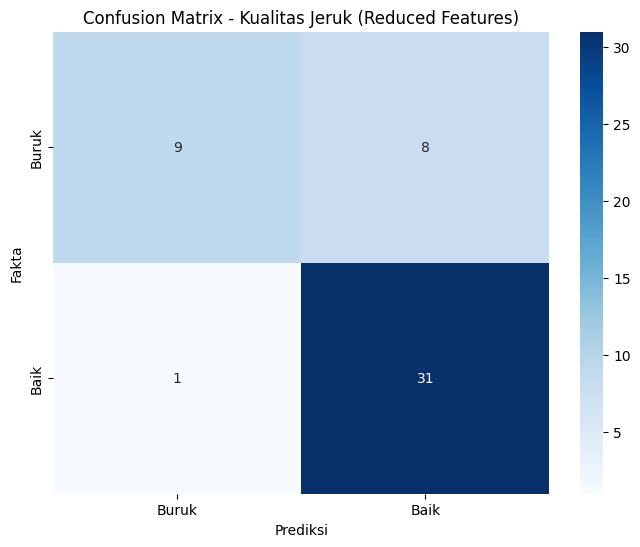


Classification Report:
              precision    recall  f1-score   support

       Buruk       0.90      0.53      0.67        17
        Baik       0.79      0.97      0.87        32

    accuracy                           0.82        49
   macro avg       0.85      0.75      0.77        49
weighted avg       0.83      0.82      0.80        49



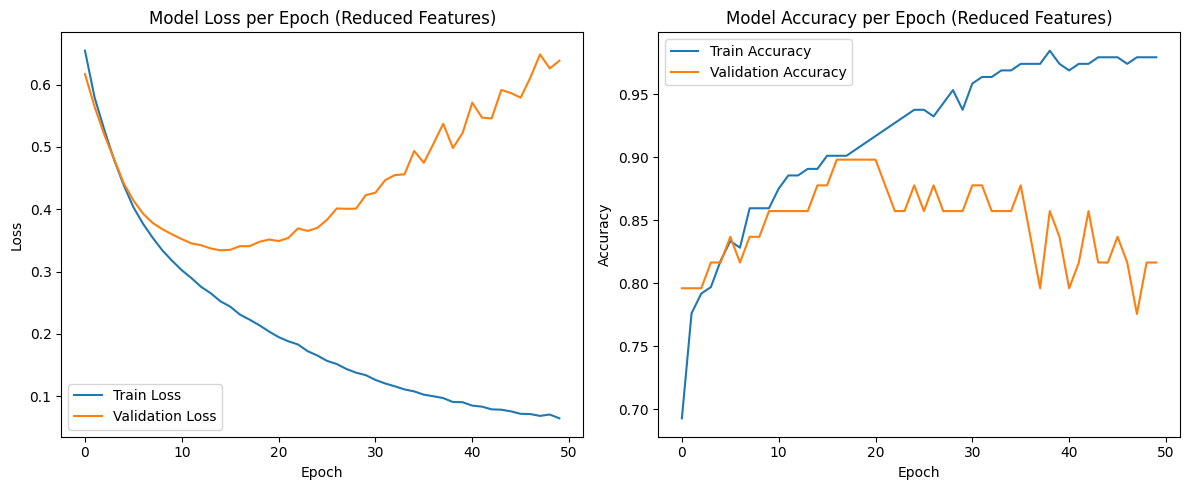

In [16]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Evaluate the model_reduced using the X_test_processed_reduced and y_test data.
loss_reduced, accuracy_reduced = model_reduced.evaluate(X_test_processed_reduced, y_test)

# 2. Print the loss and accuracy obtained from the model evaluation.
print(f"Model Loss (Binary Crossentropy) with reduced features: {loss_reduced:.4f}")
print(f"Model Accuracy with reduced features: {accuracy_reduced:.4f}")

# 3. Generate predictions for the test set X_test_processed_reduced using the model_reduced.
y_pred_probabilities_reduced = model_reduced.predict(X_test_processed_reduced)

# 4. Convert the predicted probabilities to binary class labels (0 or 1) using a threshold of 0.5.
y_pred_classes_reduced = (y_pred_probabilities_reduced > 0.5).astype("int").flatten()

# 5. Generate a confusion matrix using the true labels (y_test) and the predicted binary labels.
cm_reduced = confusion_matrix(y_test, y_pred_classes_reduced)

# 6. Print a classification report using the true labels and predicted binary labels, including precision, recall, and f1-score, using the class names ["Buruk", "Baik"].
class_names = ["Buruk", "Baik"] # Define class names based on binary target 0 and 1

print("\nConfusion Matrix:")
plt.figure(figsize=(8, 6))
sns.heatmap(cm_reduced, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Prediksi')
plt.ylabel('Fakta')
plt.title('Confusion Matrix - Kualitas Jeruk (Reduced Features)')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes_reduced, target_names=class_names))

# 7. Plot the training and validation loss from the history_reduced object to visualize the model's training progress.
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_reduced.history['loss'], label='Train Loss')
plt.plot(history_reduced.history['val_loss'], label='Validation Loss')
plt.title('Model Loss per Epoch (Reduced Features)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history_reduced.history['accuracy'], label='Train Accuracy')
plt.plot(history_reduced.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy per Epoch (Reduced Features)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [17]:
import tensorflow as tf

# Mengonversi model Keras ke format TensorFlow Lite
# Pastikan model_reduced adalah model yang ingin disimpan
converter = tf.lite.TFLiteConverter.from_keras_model(model_reduced)
tflite_model = converter.convert()

# Menyimpan model TFLite ke file
with open('jeruk_quality_reduced_features.tflite', 'wb') as f:
    f.write(tflite_model)

print("Model TFLite berhasil disimpan sebagai 'jeruk_quality_reduced_features.tflite'.")

Saved artifact at '/tmp/tmppx6rbfzm'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 7), dtype=tf.float32, name='keras_tensor_10')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  138282451486672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138282451487248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138282451487824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138282451488400: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138282451487632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138282451489168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138282451488592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138282451489936: TensorSpec(shape=(), dtype=tf.resource, name=None)
Model TFLite berhasil disimpan sebagai 'jeruk_quality_reduced_features.tflite'.


In [18]:
import tensorflow as tf

# Ganti nama file sesuai nama file kamu
interpreter = tf.lite.Interpreter(model_path="jeruk_quality_reduced_features.tflite")
interpreter.allocate_tensors()

# Cek input
input_details = interpreter.get_input_details()
print("Input Details:")
print(input_details)

# Cek output
output_details = interpreter.get_output_details()
print("Output Details:")
print(output_details)


Input Details:
[{'name': 'serving_default_keras_tensor_10:0', 'index': 0, 'shape': array([1, 7], dtype=int32), 'shape_signature': array([-1,  7], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
Output Details:
[{'name': 'StatefulPartitionedCall_1:0', 'index': 13, 'shape': array([1, 1], dtype=int32), 'shape_signature': array([-1,  1], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [20]:
!ls

jeruk_quality_reduced_features.tflite  orange-quality	   sample_data
kaggle.json			       orange-quality.zip


In [21]:
!ls orange-quality

'Orange Quality Data.csv'


In [22]:
# Load the dataset with the correct path and filename
df_eda = pd.read_csv('orange-quality/Orange Quality Data.csv')

# Display the first few rows
print("First 5 rows of the dataset:")
display(df_eda.head())

# Display data types
print("\nData types of each column:")
df_eda.info()

# Display summary statistics for numerical columns
print("\nSummary statistics of numerical columns:")
display(df_eda.describe())

First 5 rows of the dataset:


,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
0,7.5,180,12.0,3.2,2.0,10,4.0,Orange,Valencia,N,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,Deep Orange,Navel,N,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,Light Orange,Cara Cara,N,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,Orange-Red,Blood Orange,N,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,Orange,Hamlin,Y (Minor),4.5



Data types of each column:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Size (cm)           241 non-null    float64
 1   Weight (g)          241 non-null    int64  
 2   Brix (Sweetness)    241 non-null    float64
 3   pH (Acidity)        241 non-null    float64
 4   Softness (1-5)      241 non-null    float64
 5   HarvestTime (days)  241 non-null    int64  
 6   Ripeness (1-5)      241 non-null    float64
 7   Color               241 non-null    object 
 8   Variety             241 non-null    object 
 9   Blemishes (Y/N)     241 non-null    object 
 10  Quality (1-5)       241 non-null    float64
dtypes: float64(6), int64(2), object(3)
memory usage: 20.8+ KB

Summary statistics of numerical columns:


,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Quality (1-5)
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000
mean,7.844813,205.128631,10.907884,3.473900,3.072614,15.344398,3.599585,3.817427
std,1.086002,56.461012,2.760446,0.421007,1.323630,5.323852,1.205214,1.014410
min,6.000000,100.000000,5.500000,2.800000,1.000000,4.000000,1.000000,1.000000
25%,6.900000,155.000000,8.500000,3.200000,2.000000,11.000000,3.000000,3.000000
50%,7.800000,205.000000,11.000000,3.400000,3.000000,15.000000,4.000000,4.000000
75%,8.700000,252.000000,13.400000,3.800000,4.000000,20.000000,4.500000,4.500000
max,10.000000,300.000000,16.000000,4.400000,5.000000,25.000000,5.000000,5.000000


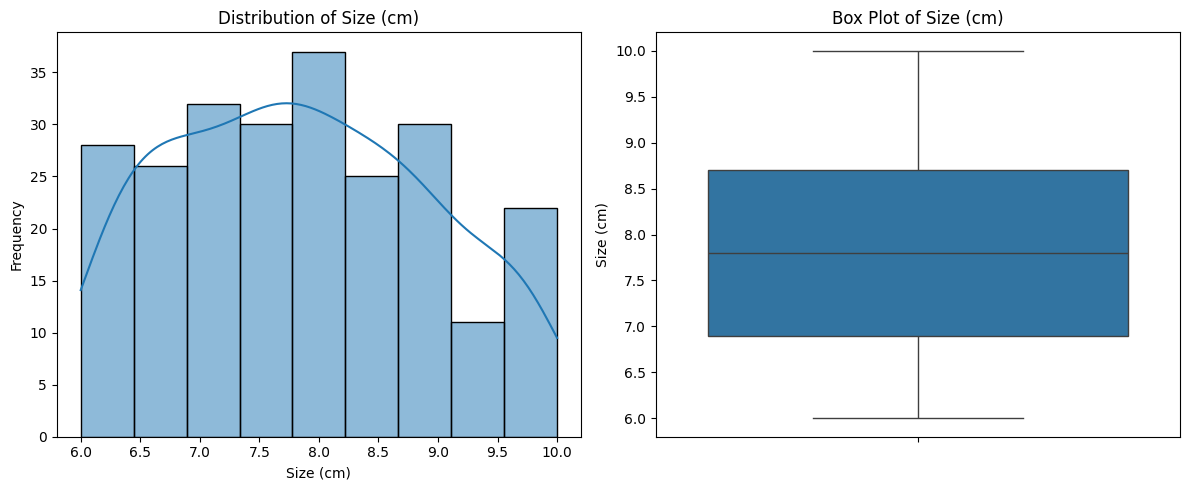

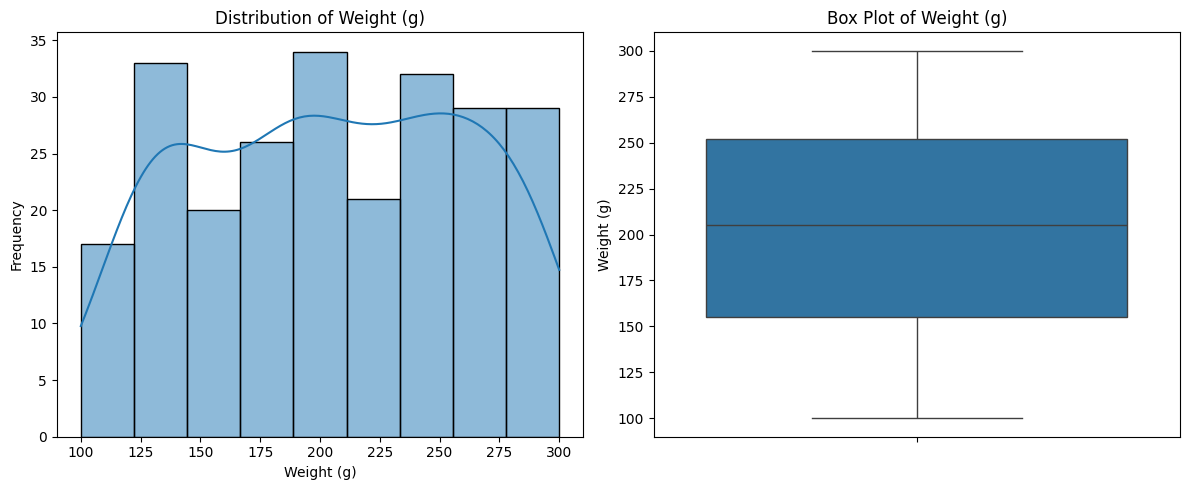

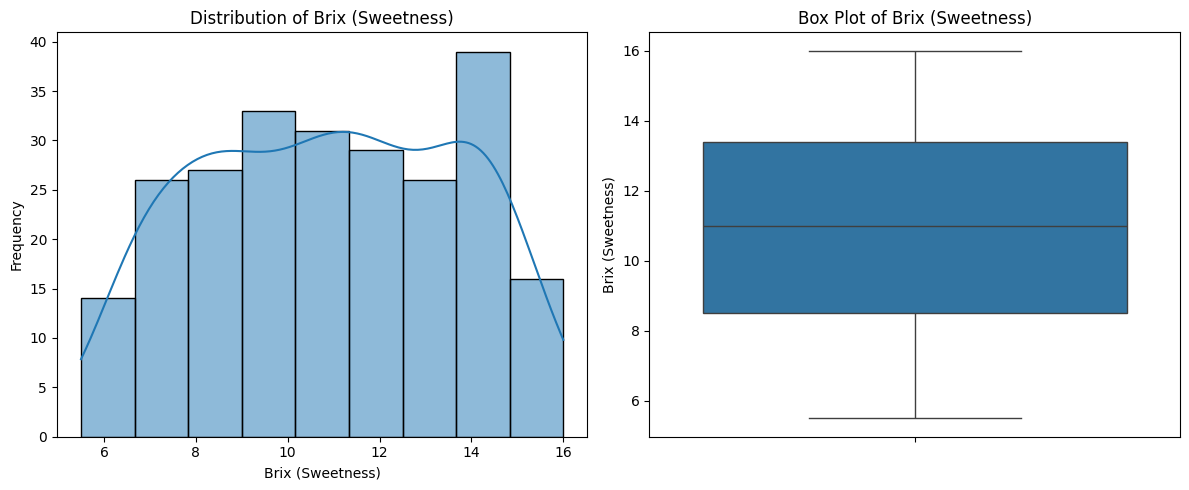

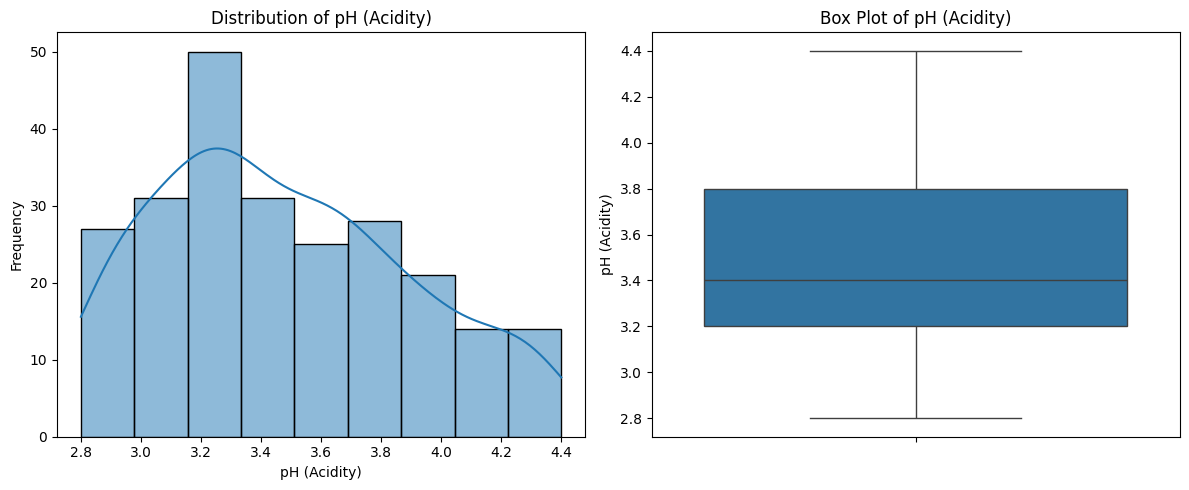

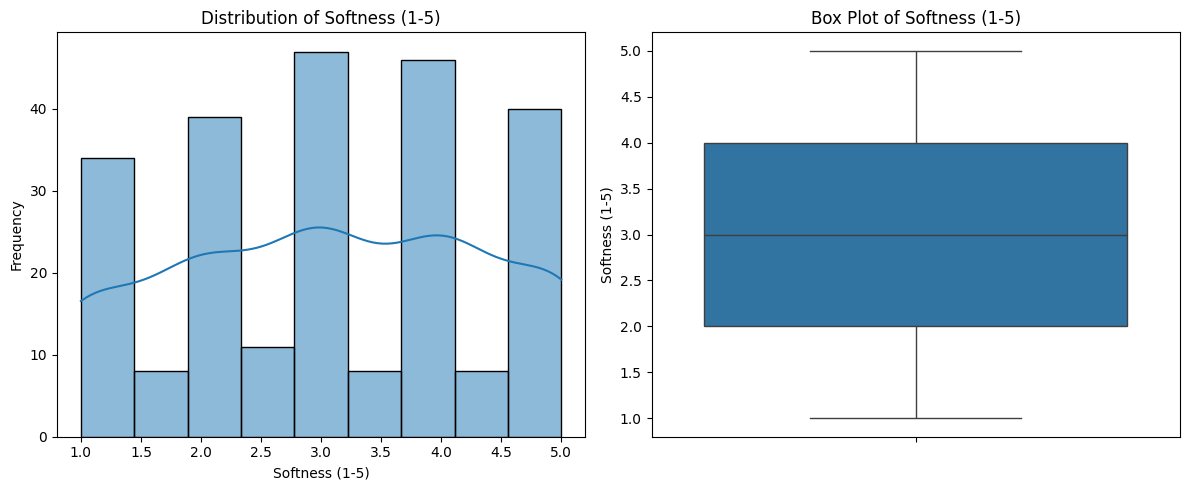

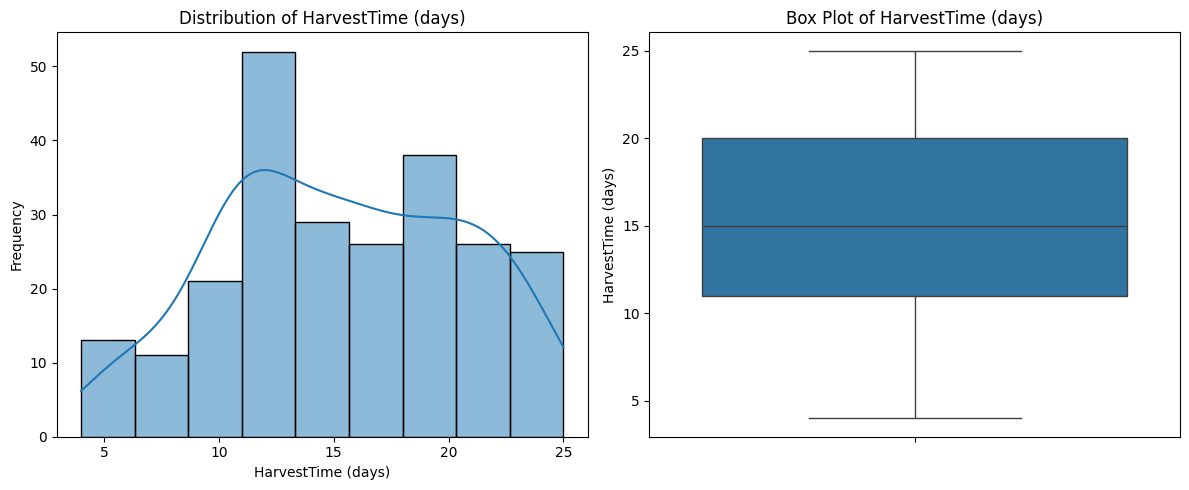

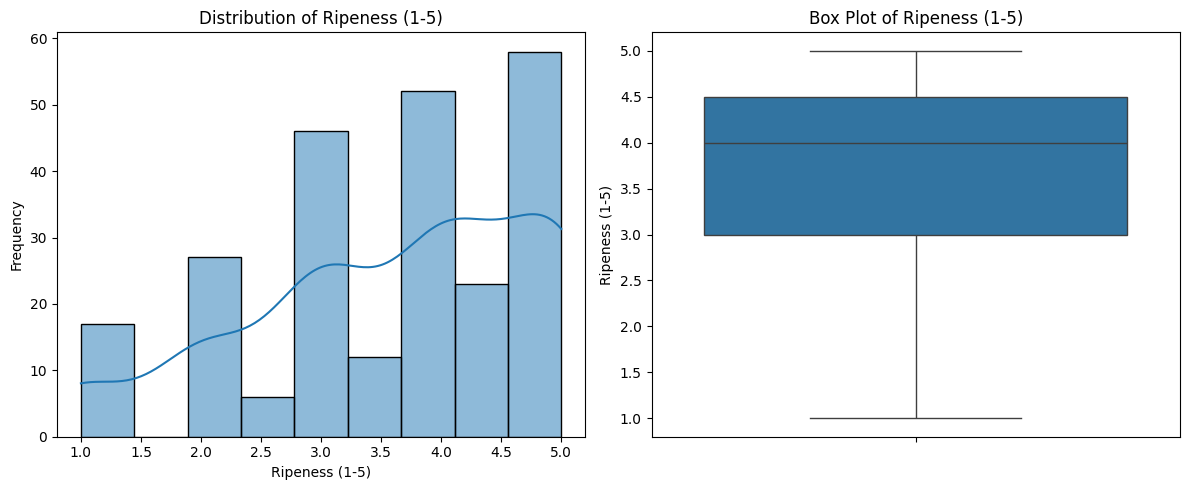

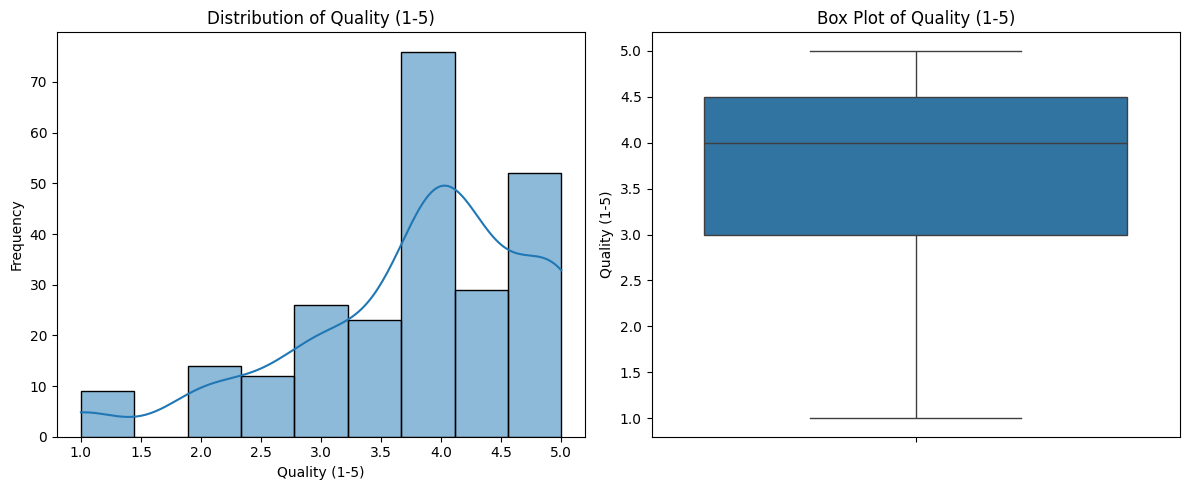

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the numerical columns from the df_eda DataFrame
numerical_cols = df_eda.select_dtypes(include=np.number).columns.tolist()

# Iterate through the selected numerical columns and create visualizations
for col in numerical_cols:
    plt.figure(figsize=(12, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data=df_eda, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Box plot
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df_eda, y=col)
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)

    plt.tight_layout()
    plt.show()

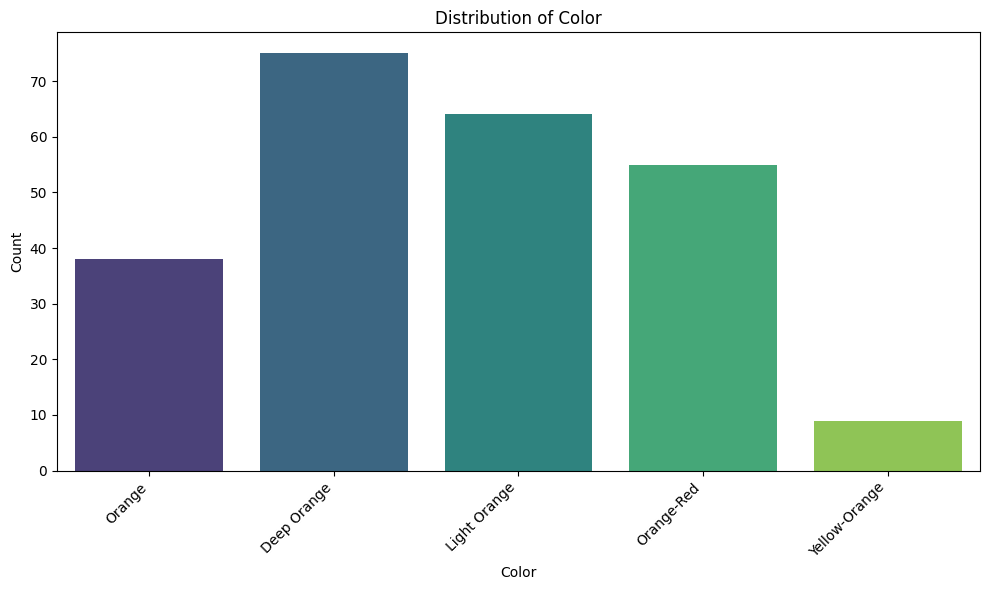

/tmp/ipython-input-24-425732928.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_eda, x=col, palette='viridis') # Use a color palette


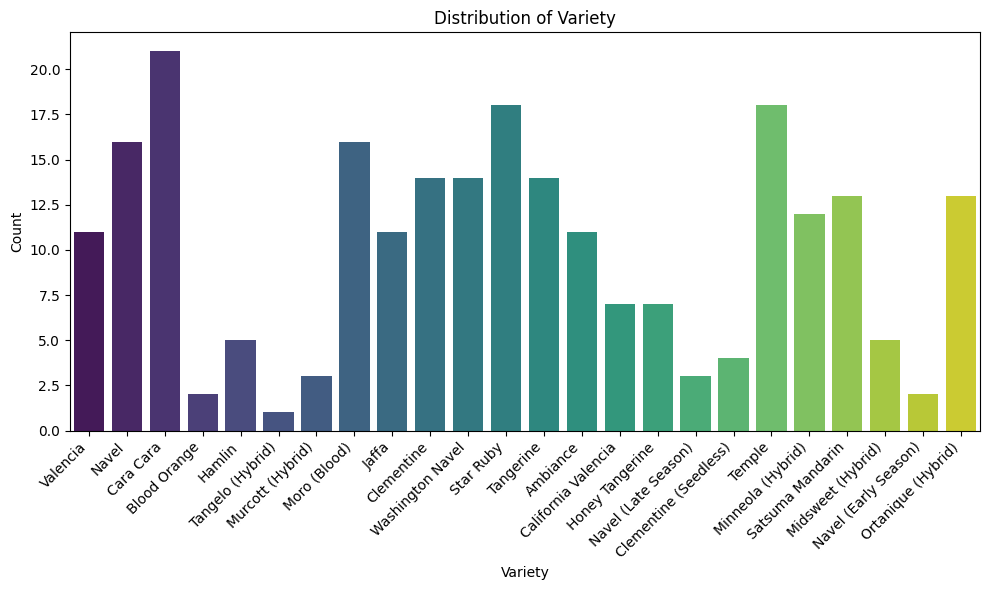

/tmp/ipython-input-24-425732928.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_eda, x=col, palette='viridis') # Use a color palette


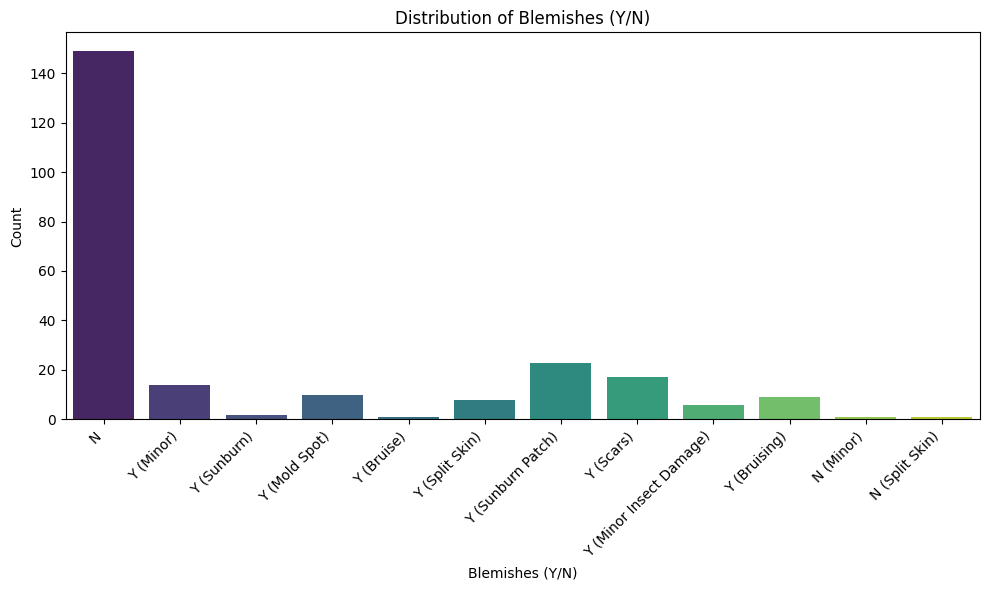

In [24]:
# Select the categorical columns from the df_eda DataFrame
categorical_cols = df_eda.select_dtypes(include=['object', 'bool', 'category']).columns.tolist()

# Iterate through the selected categorical columns and create count plots
for col in categorical_cols:
    plt.figure(figsize=(10, 6)) # Adjust figure size for better readability
    sns.countplot(data=df_eda, x=col, palette='viridis') # Use a color palette
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right') # Rotate labels for readability
    plt.tight_layout() # Adjust layout to prevent labels overlapping
    plt.show()

In [25]:
# Select numerical columns for correlation analysis and pair plots
numerical_cols = df_eda.select_dtypes(include=np.number).columns.tolist()

# Select categorical columns for visualizations with numerical features or the target
categorical_cols = df_eda.select_dtypes(include=['object', 'bool', 'category']).columns.tolist()

print("Numerical columns selected for correlation analysis and pair plots:")
print(numerical_cols)
print("\nCategorical columns selected for visualizations:")
print(categorical_cols)

Numerical columns selected for correlation analysis and pair plots:
['Size (cm)', 'Weight (g)', 'Brix (Sweetness)', 'pH (Acidity)', 'Softness (1-5)', 'HarvestTime (days)', 'Ripeness (1-5)', 'Quality (1-5)']

Categorical columns selected for visualizations:
['Color', 'Variety', 'Blemishes (Y/N)']


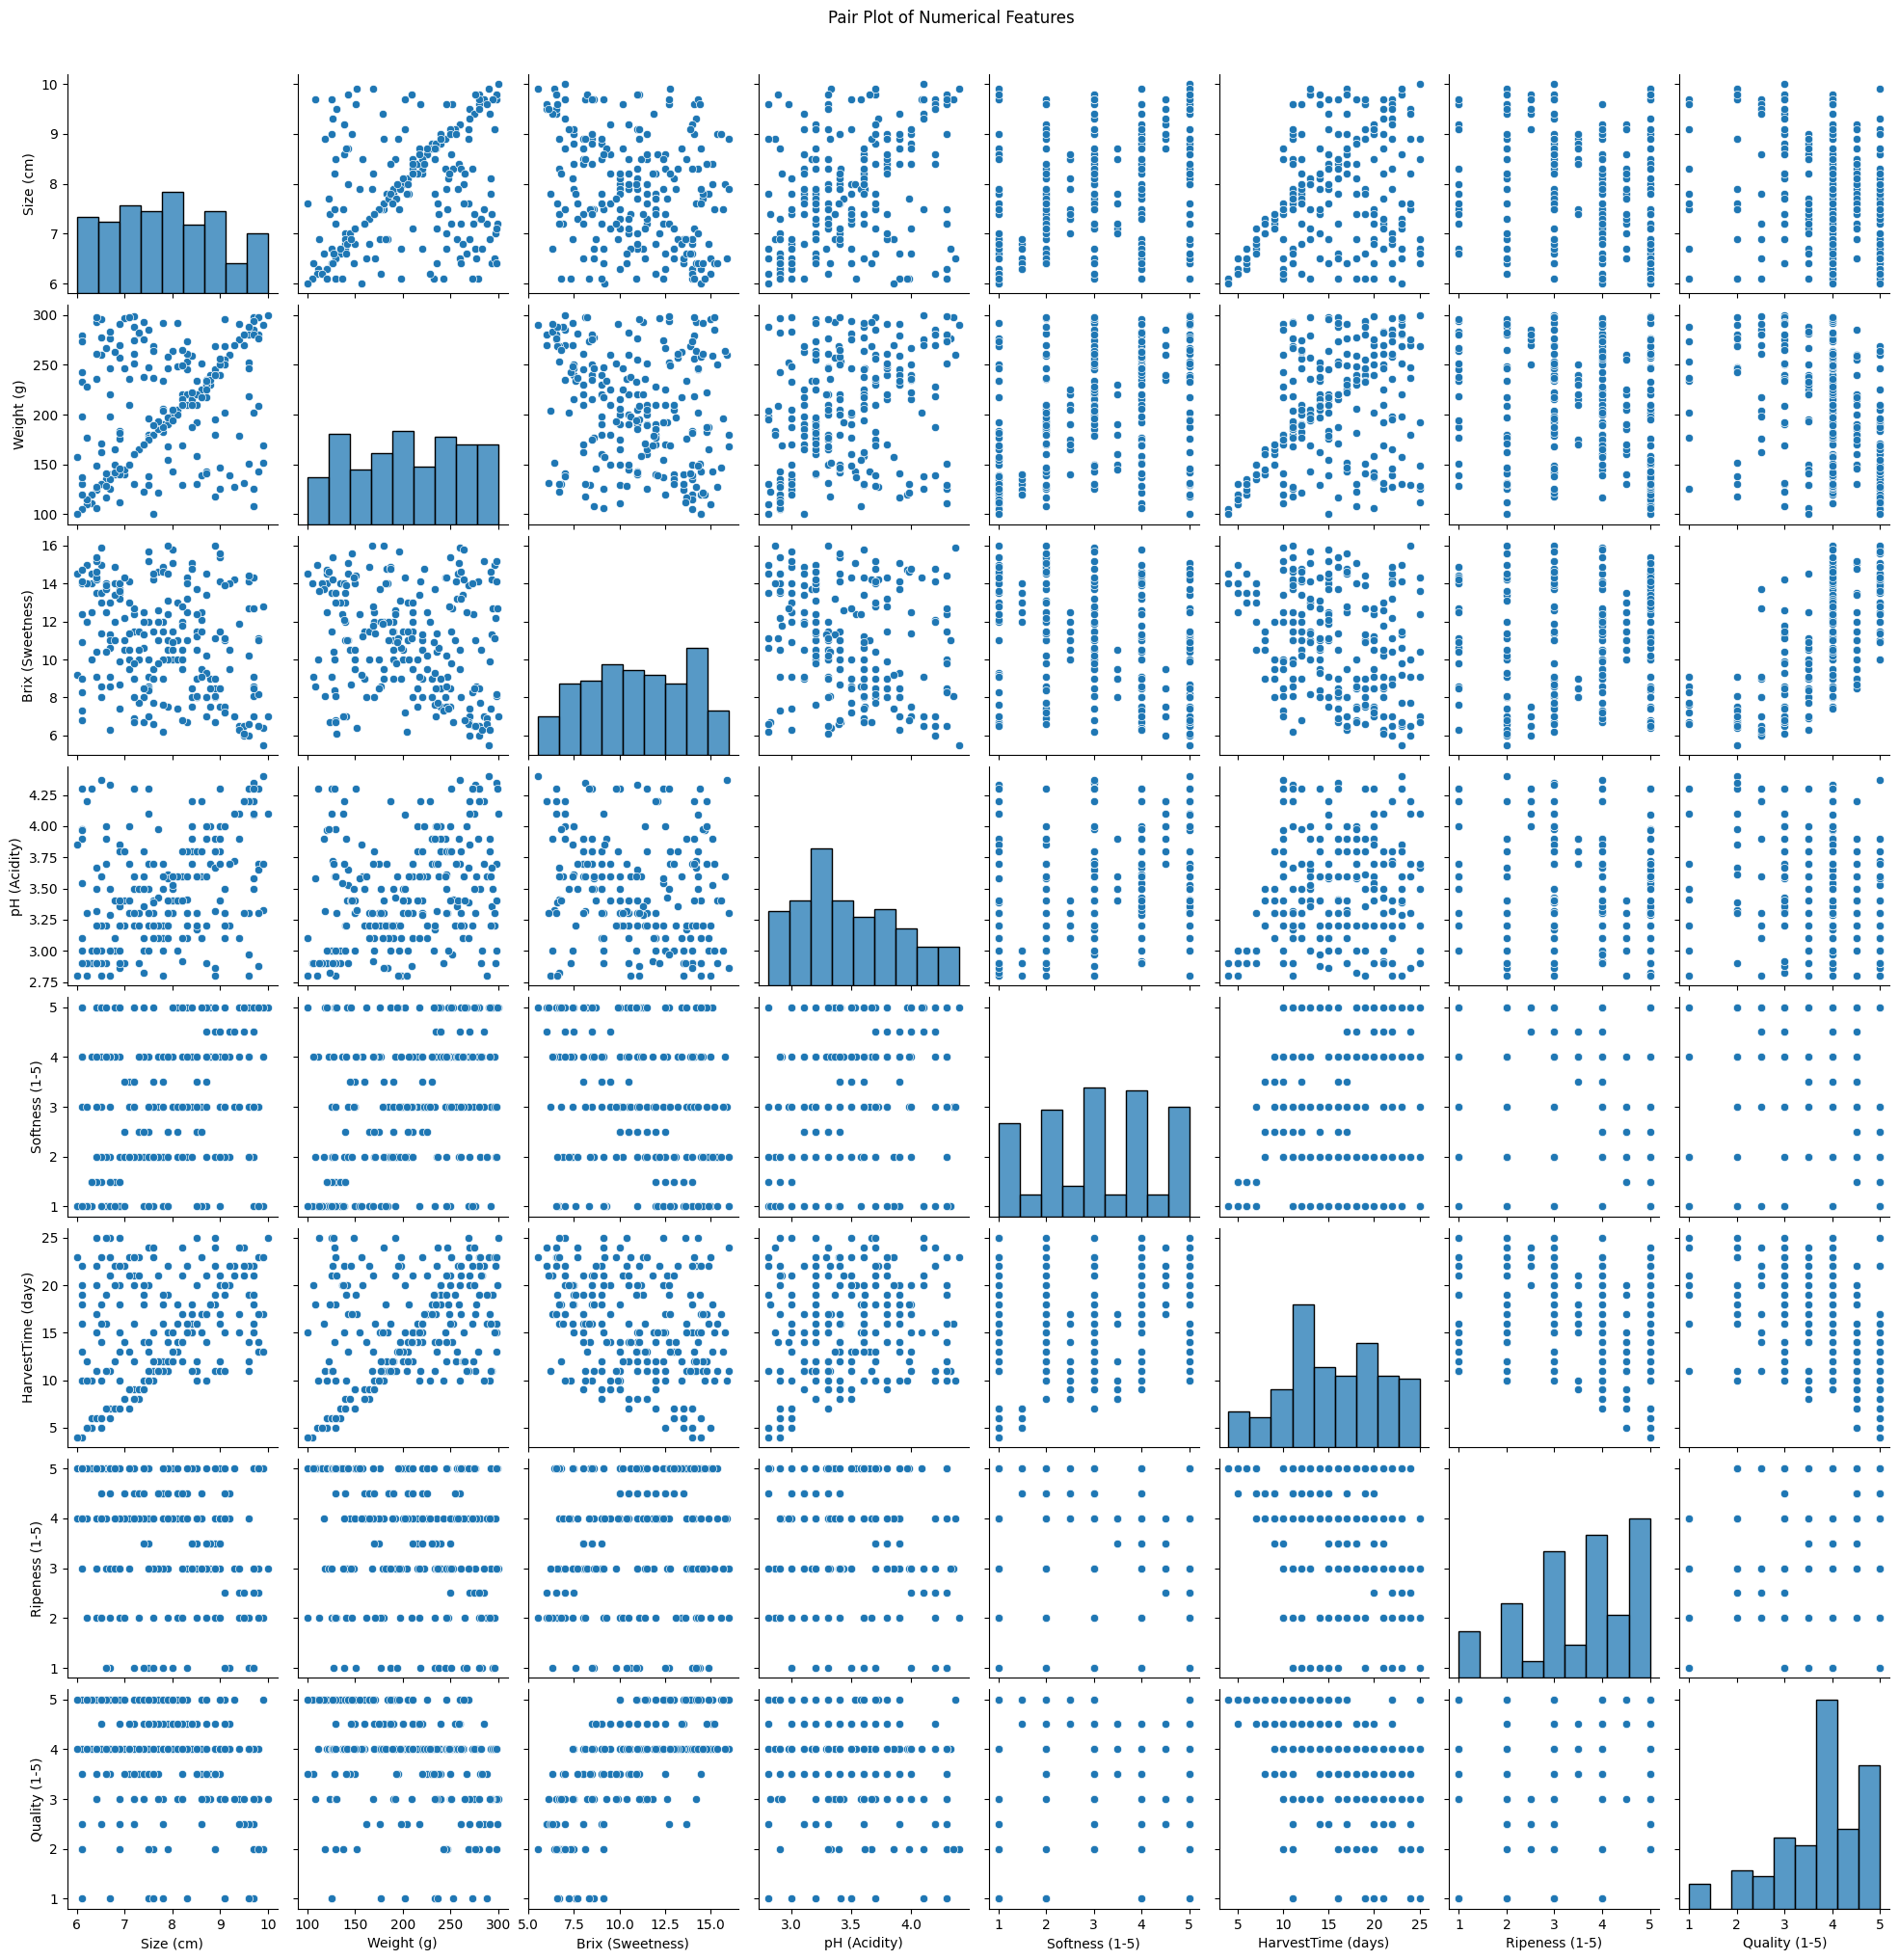

In [26]:
# Generate a pair plot for the selected numerical columns
sns.pairplot(df_eda[numerical_cols])
plt.suptitle('Pair Plot of Numerical Features', y=1.02) # Add a title
plt.show()

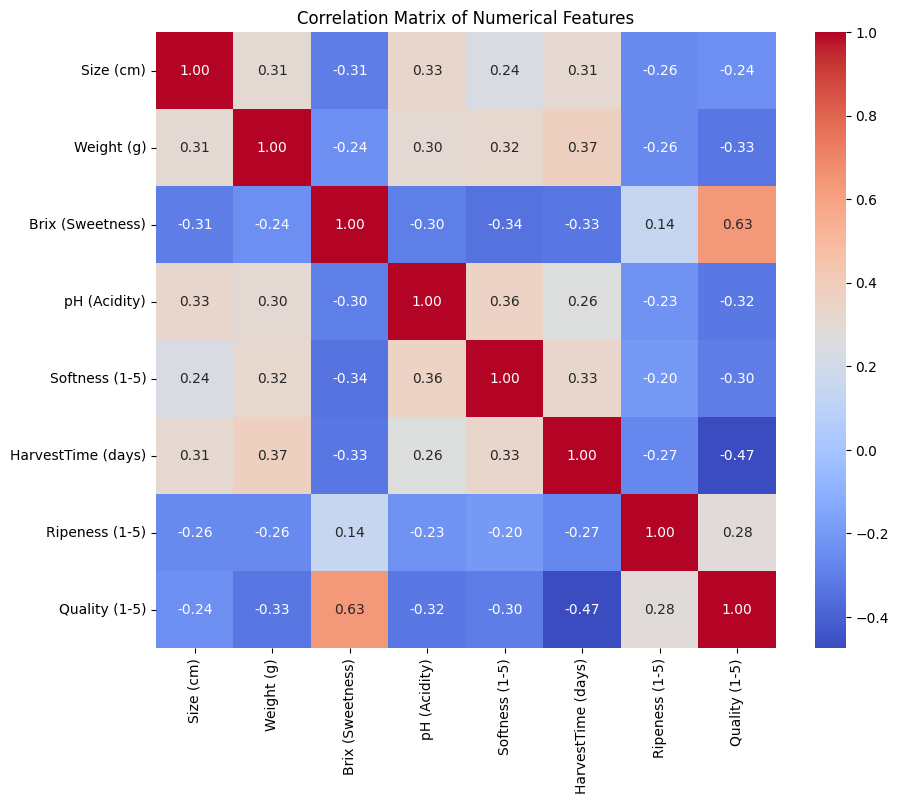

In [27]:
# Calculate the correlation matrix for the numerical columns
correlation_matrix = df_eda[numerical_cols].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

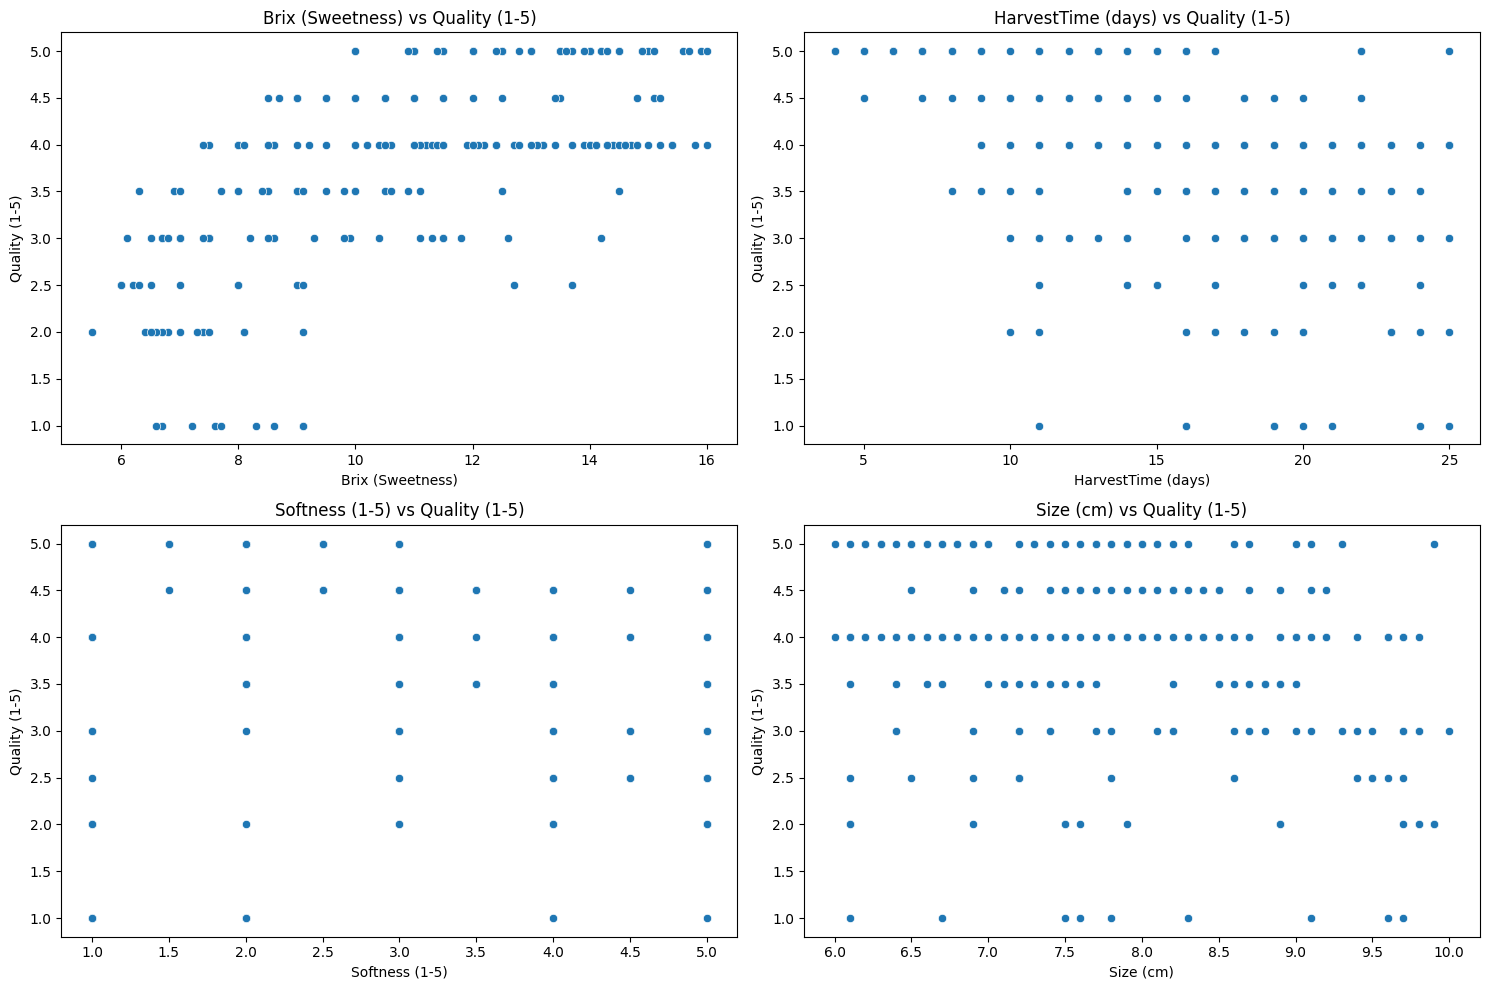

In [28]:
# Create scatter plots for a few key numerical features against 'Quality (1-5)'
key_numerical_features = ['Brix (Sweetness)', 'HarvestTime (days)', 'Softness (1-5)', 'Size (cm)']

plt.figure(figsize=(15, 10))
for i, col in enumerate(key_numerical_features):
    plt.subplot(2, 2, i + 1)
    sns.scatterplot(data=df_eda, x=col, y='Quality (1-5)')
    plt.title(f'{col} vs Quality (1-5)')
    plt.xlabel(col)
    plt.ylabel('Quality (1-5)')

plt.tight_layout()
plt.show()

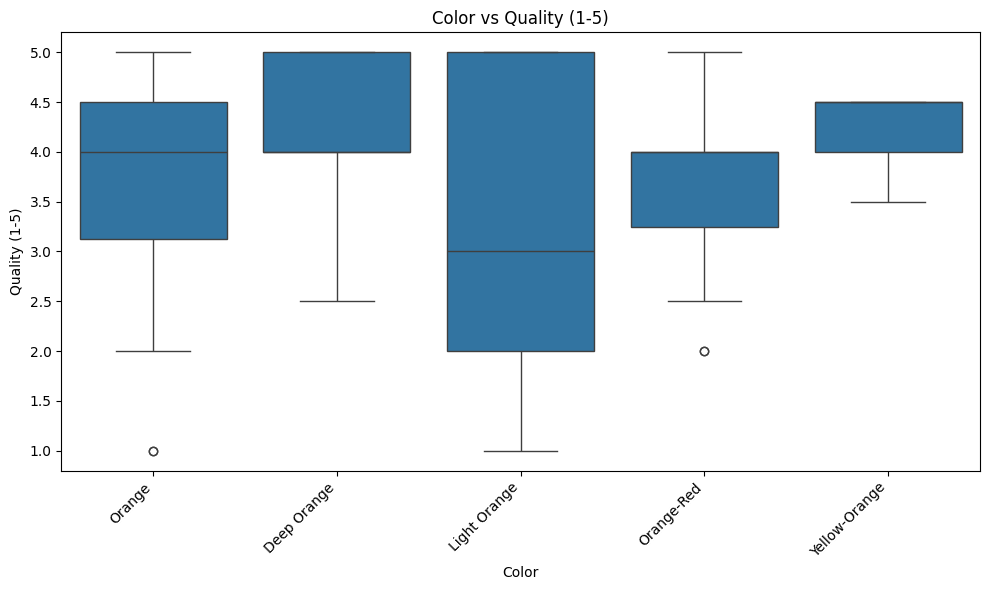

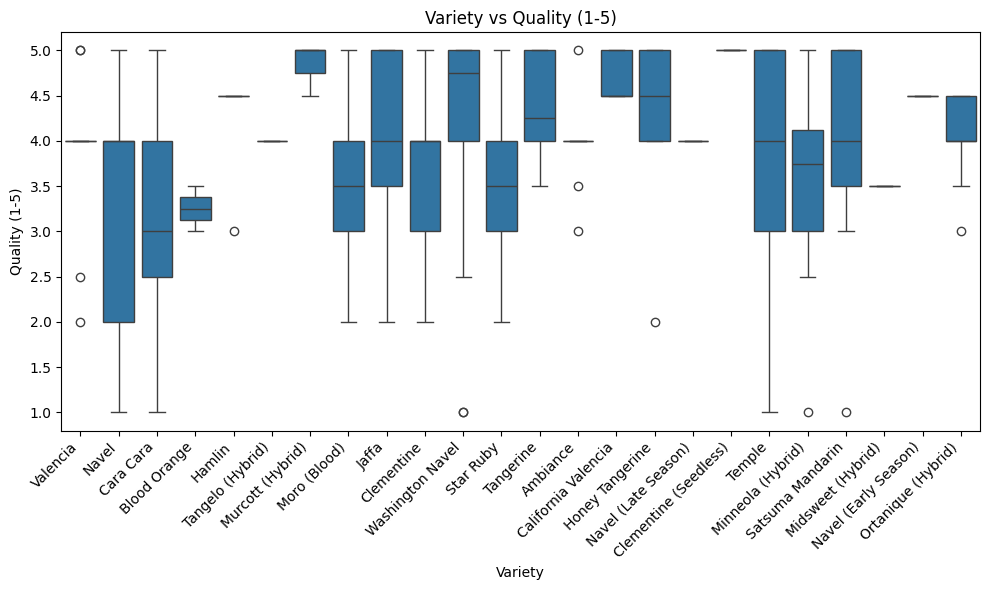

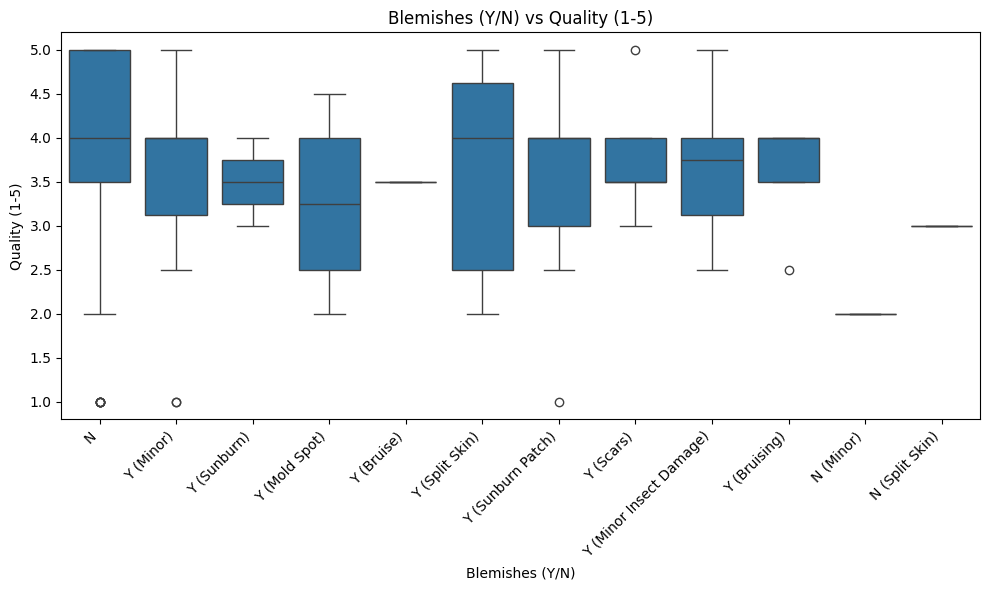

In [29]:
# Create box plots for categorical features against 'Quality (1-5)'
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df_eda, x=col, y='Quality (1-5)')
    plt.title(f'{col} vs Quality (1-5)')
    plt.xlabel(col)
    plt.ylabel('Quality (1-5)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

Visualizing numerical features vs Target_Binary:


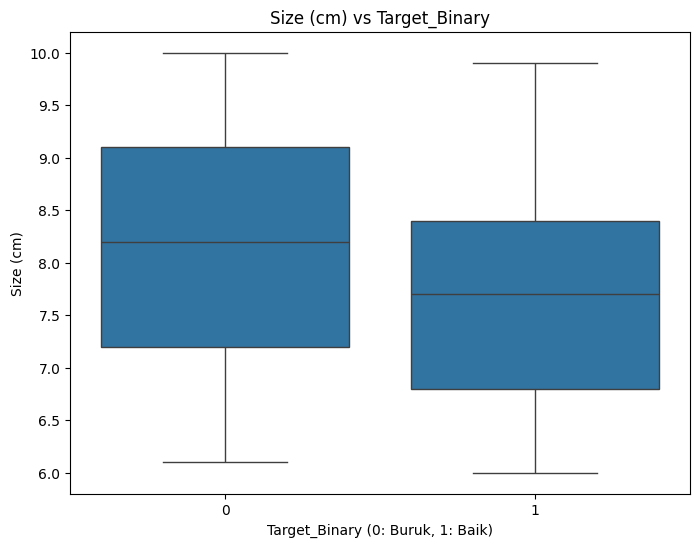

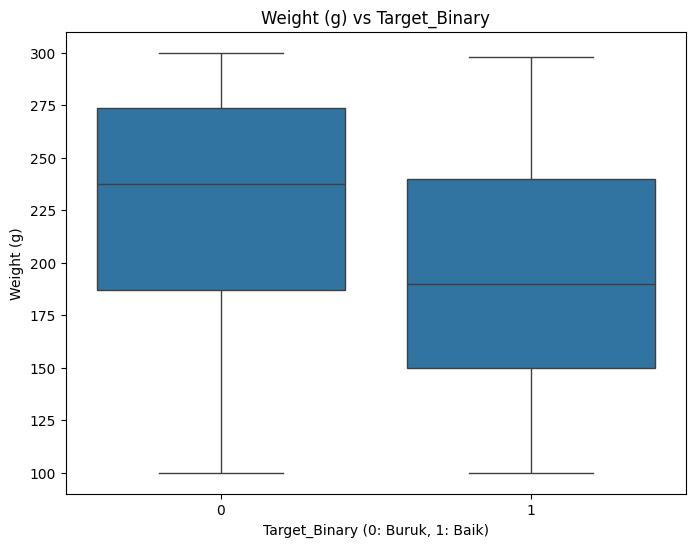

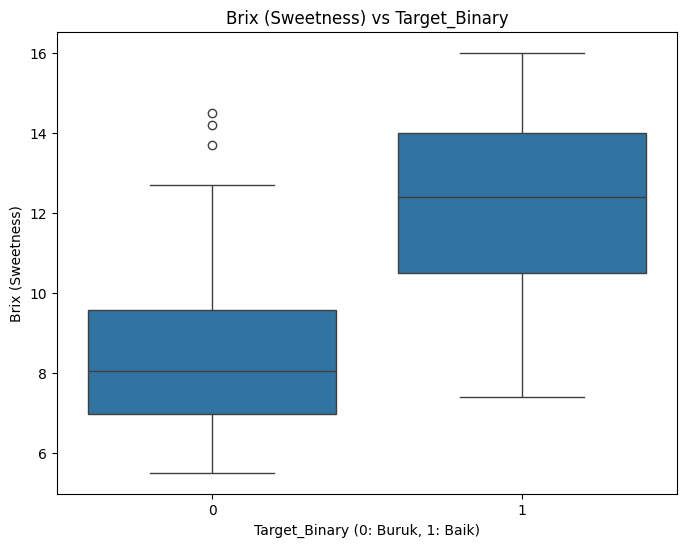

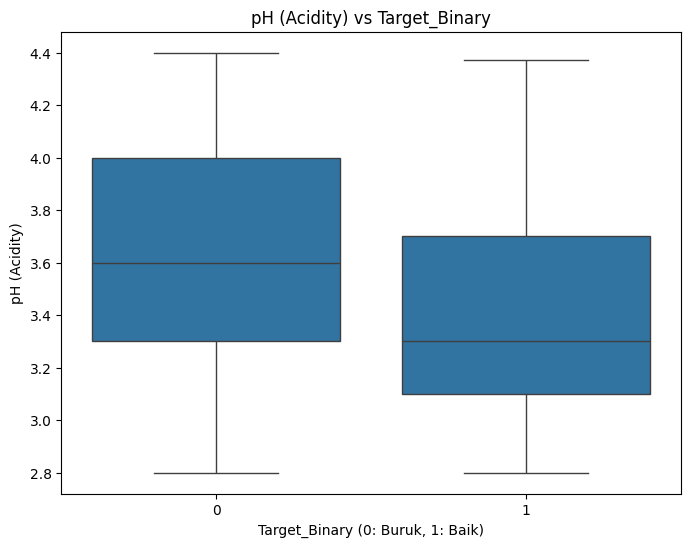

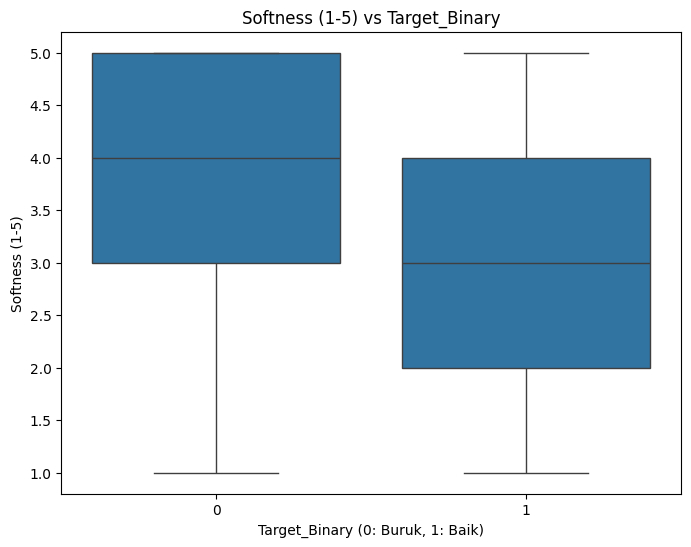

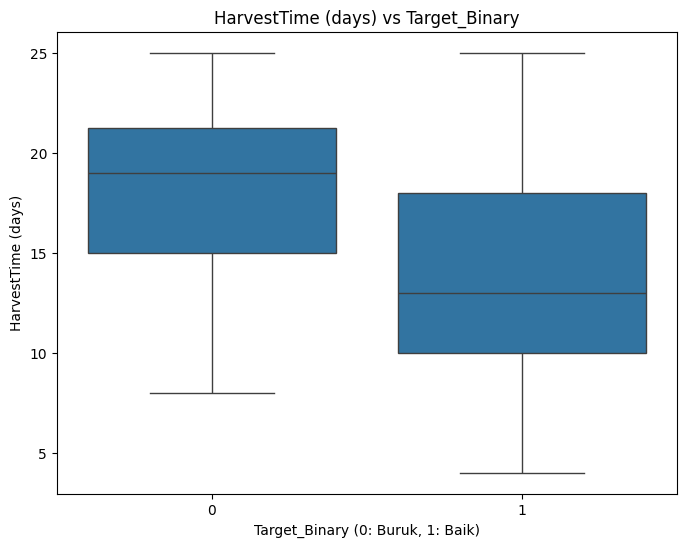

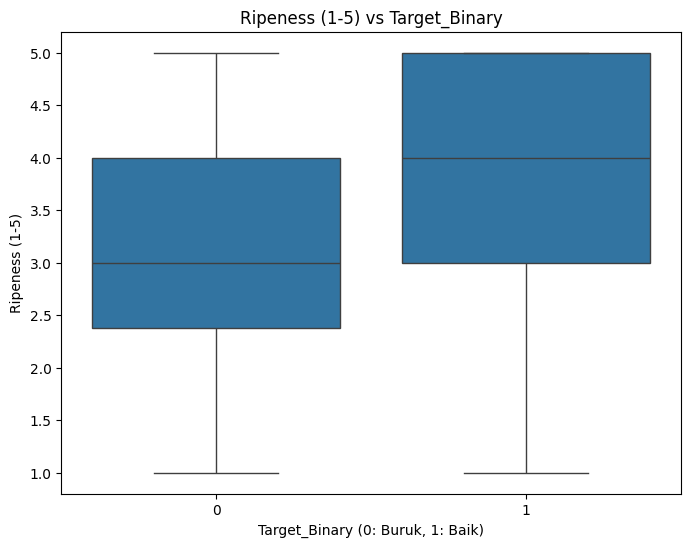


Visualizing categorical features vs Target_Binary:


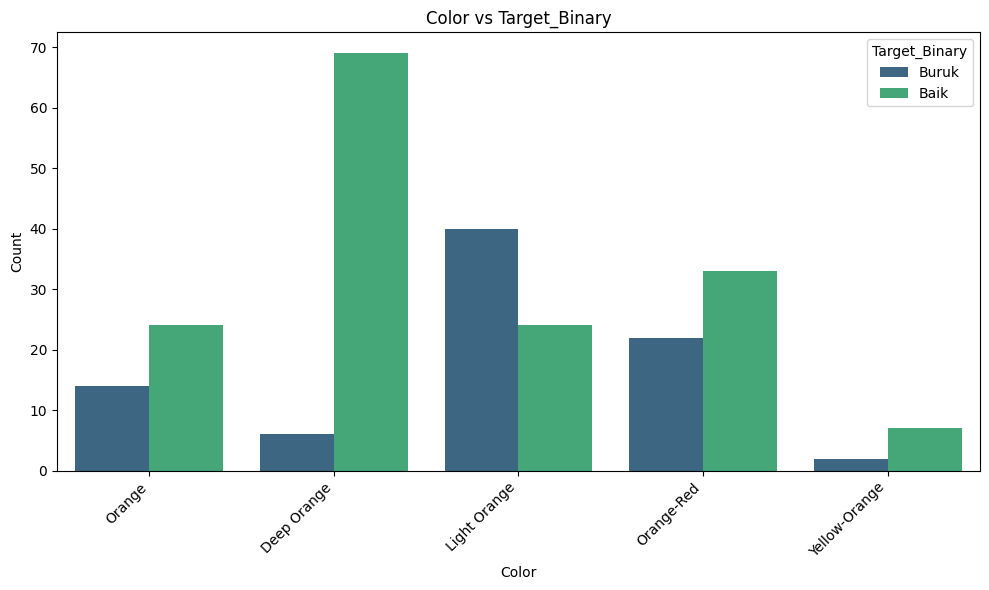

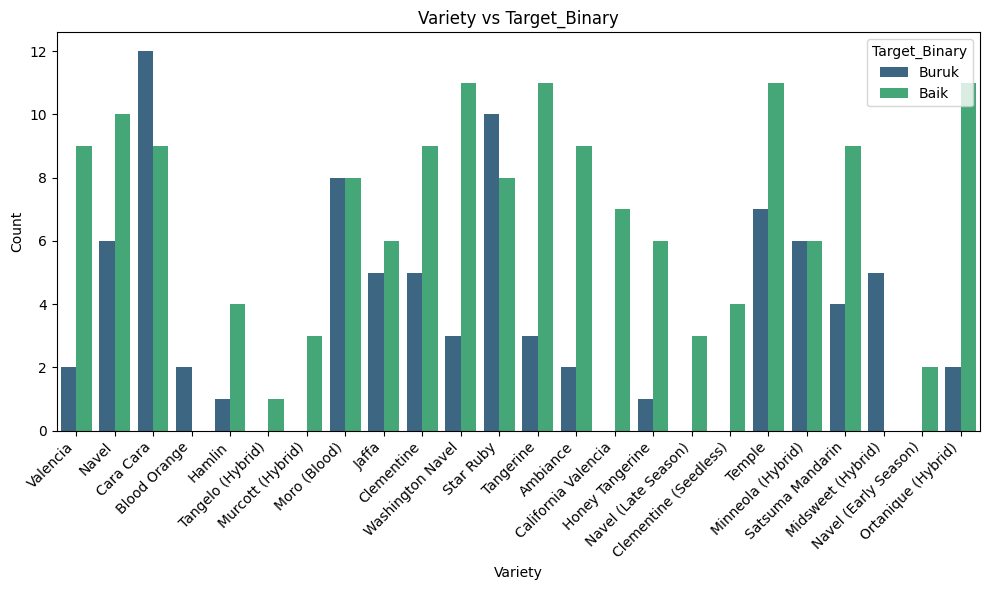

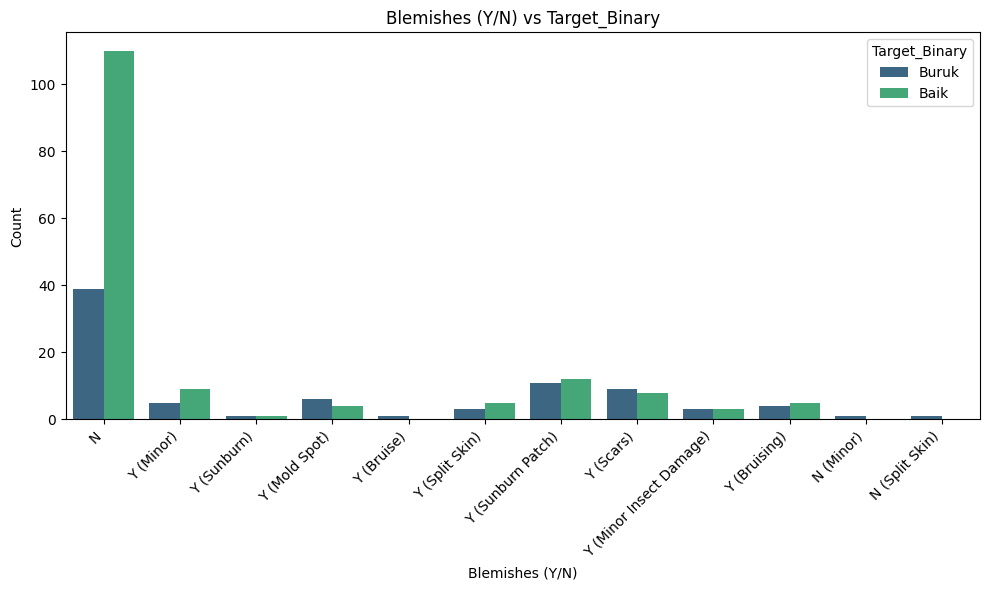

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the numerical columns from the df DataFrame (excluding 'Target' and 'Target_Binary')
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
numerical_cols = [col for col in numerical_cols if col not in ['Target', 'Target_Binary']]

# Select the categorical columns from the df DataFrame
categorical_cols = df.select_dtypes(include=['object', 'bool', 'category']).columns.tolist()

# Create box plots or violin plots for each selected numerical feature against the binary target variable
print("Visualizing numerical features vs Target_Binary:")
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x='Target_Binary', y=col)
    plt.title(f'{col} vs Target_Binary')
    plt.xlabel('Target_Binary (0: Buruk, 1: Baik)')
    plt.ylabel(col)
    plt.show()

# Create grouped bar plots for each selected categorical feature against the binary target variable
print("\nVisualizing categorical features vs Target_Binary:")
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col, hue='Target_Binary', palette='viridis')
    plt.title(f'{col} vs Target_Binary')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Target_Binary', labels=['Buruk', 'Baik'])
    plt.tight_layout()
    plt.show()
